# Type-token ratio curves of parents' speech in response to infants babbling

##### Authors:  Steven L. Elmlinger (sle64@cornell.edu) based on code graciously provided by Anonymous Reviewer 3.

The simulations based on the framework below can be found in our ICDL paper *Babbling Elicits Simplified Caregiver Speech: Findings from Natural Interaction and Simulation*.

---------------
## Summary
In this simulation, we will build theoretical corpora of words with different sizes and test the effects of their size on the type-token ratio (log) curves they produce. 

### 1. load packages

In [19]:
import math
import pandas as pd
%matplotlib inline

### 2. set variables for the model

Variables:

- log (inverse of exponent... default is base 10)

- assuming that the number of unique words Y for total words X follows this function:

`Y = k log(X)`

`k` should be different for contingent and non-contingent

`k` is essentially how far in the vertical direction the curve jumps

In [20]:
k_contingency = 500/math.log(3000)

print(k_contingency)

k_nonContingency = 600/math.log(3000)

print(k_nonContingency)

k_control = 70


62.450292941864376
74.94035153023725


So when Y (number of unique words) differs across contingent and non-contingent, so too does K.

### 3. run experiments

k_contingency, k_nonContingency and k_control are the same

In [21]:
k_contingency = k_nonContingency = k_control = 60

# How does Y (number of unique words) change as we increase X

In [22]:
numContingency = k_contingency * math.log(6000)

print(numContingency)

521.9708848926115


In [23]:
numNonContingency = k_nonContingency * math.log(20000)

print(numNonContingency)

594.2092531521677


In [24]:
numControl = k_control * math.log(26000)

print(numControl)

609.9511090202171


In [25]:
def expectedUniqueN(n, k):
    
    return n * ( 1- pow((n-1)*1.0/n,k))

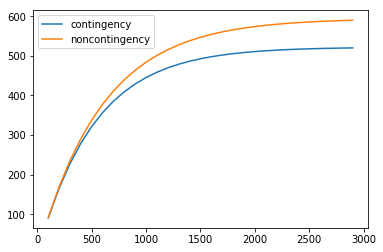

In [26]:
EX_contingency = [expectedUniqueN(numContingency, i) for i in range(100,3000,100)]

EX_noncontingency = [expectedUniqueN(numNonContingency, i) for i in range(100,3000,100)]

df = pd.DataFrame(data={'contingency': EX_contingency,
                        
                        'noncontingency': EX_noncontingency},
                  
                        index=range(100,3000,100))

df.plot()

The above plot is what we would expect if the K values are the same and the only differences are sample size.

Now let's build a control dataset.

The control has a 762 words out of a 26k corpus.

In [1]:
# if we sample 6000 words from this list it will contain

numContingencyControl = expectedUniqueN(numControl, 6000)

print(numContingencyControl)

# if we sample 20000 words from this list it will contain

numNonContingencyControl = expectedUniqueN(numControl, 20000)

print(numNonContingencyControl)

NameError: name 'expectedUniqueN' is not defined

These are the same because they have the same K.

The intuition for this is that because they both sample from a single original corpus, no differences in number of samples will produce a difference in number of expected unique entries.

*Experiment 2*

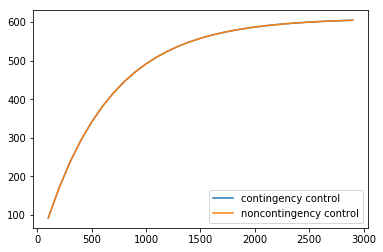

In [28]:
EX_contingency_control = [expectedUniqueN(numContingencyControl, i) for i in range(100,3000,100)]

EX_noncontingency_control = [expectedUniqueN(numContingencyControl, i) for i in range(100,3000,100)]

df_control = pd.DataFrame(data={'contingency control': EX_contingency_control,
                                
                                'noncontingency control': EX_noncontingency_control},
                          
                                index=range(100,3000,100))

df_control.plot()

Finally, lets check the magnitude of difference between the two experiments. The differences we observe here can be interpreted as the magnitude of difference we would observe due to the differences in words, after controlling for the effects due to sample size differences.

*Experiment 3*

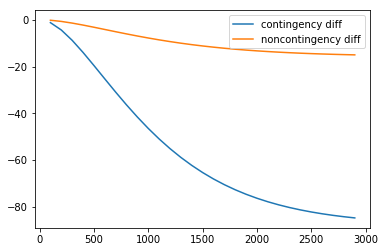

In [31]:
EX_contingency_diff = [expectedUniqueN(numContingency, i) - expectedUniqueN(numControl, i)  for i in range(100,3000,100)]

EX_noncontingency_diff = [expectedUniqueN(numNonContingency, i) - expectedUniqueN(numControl, i)  for i in range(100,3000,100)]

df_control_diff = pd.DataFrame(data={'contingency diff': EX_contingency_diff,
                                     
                                     'noncontingency diff': EX_noncontingency_diff},
                               
                                     index=range(100,3000,100))

df_control_diff.plot()